

## **Transfer Learning**

In [ ]:
## Importing libraries:
from tensorflow import keras
from keras.applications.efficientnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB0

import urllib.request
import matplotlib.pyplot as plt
import numpy as np

### **Showing the image:**

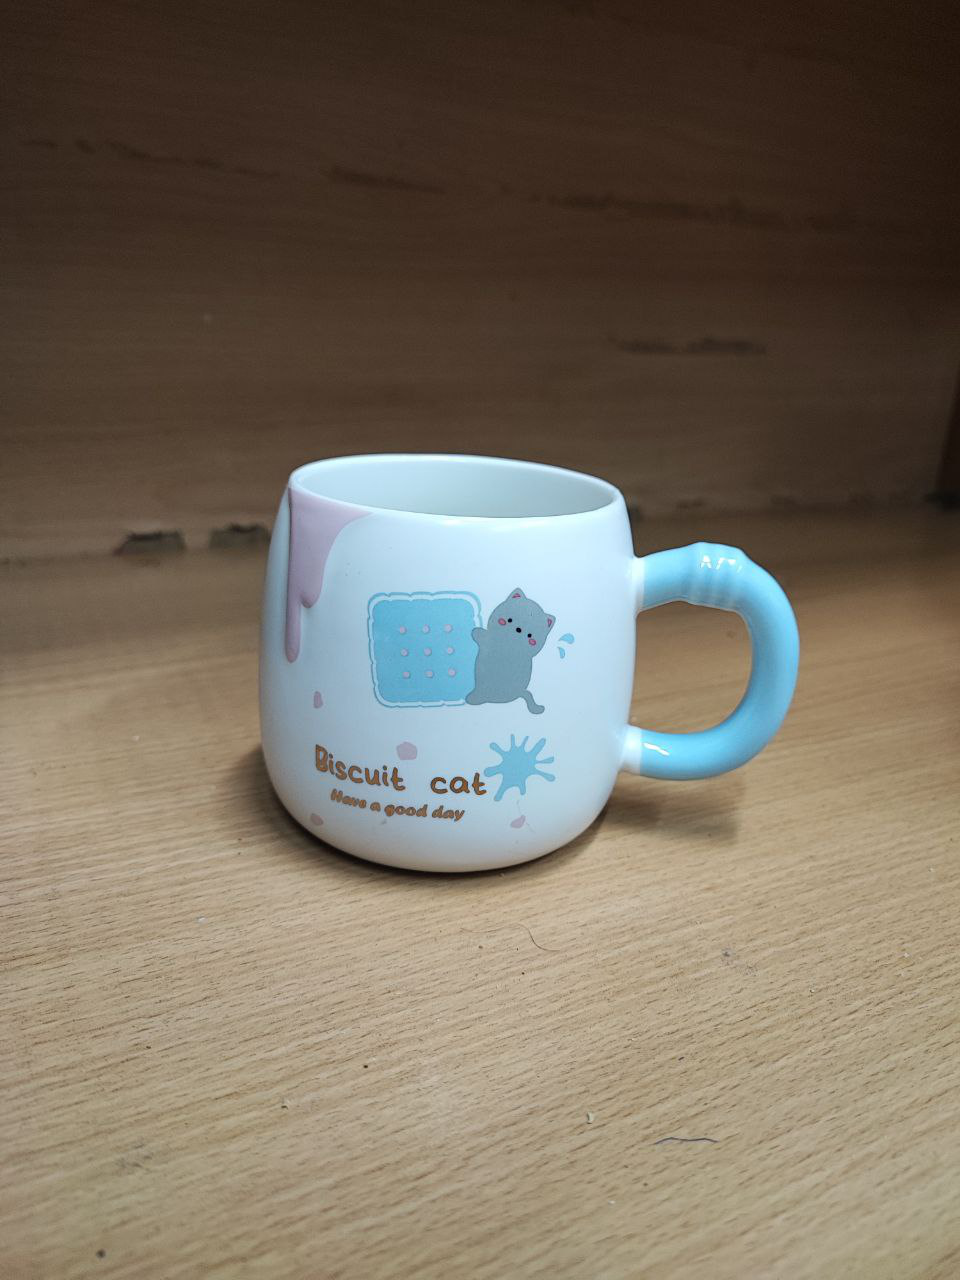

In [ ]:
import IPython.display as display
from PIL import Image
display.display(Image.open('mug1.jpg'))

### **Preprocessing:**

In [ ]:
img = image.load_img('mug1.jpg', target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, 0)

### **Creating the Efficient Net:**

In [ ]:
effnet = keras.applications.EfficientNetB0(weights='imagenet', include_top=True)
pred = effnet.predict(img)
for i in range(3):
  print('Prediction {}:'.format(i+1))
  print('Category: ', (decode_predictions(pred))[0][i][1])
  print('Probability: ', (decode_predictions(pred))[0][i][2], '\n')

1/1 [==============================] - 2s 2s/step
Prediction 1:
Category:  coffee_mug
Probability:  0.6930338 

Prediction 2:
Category:  cup
Probability:  0.078602426 

Prediction 3:
Category:  teapot
Probability:  0.030009251 



### **Showing another image:**

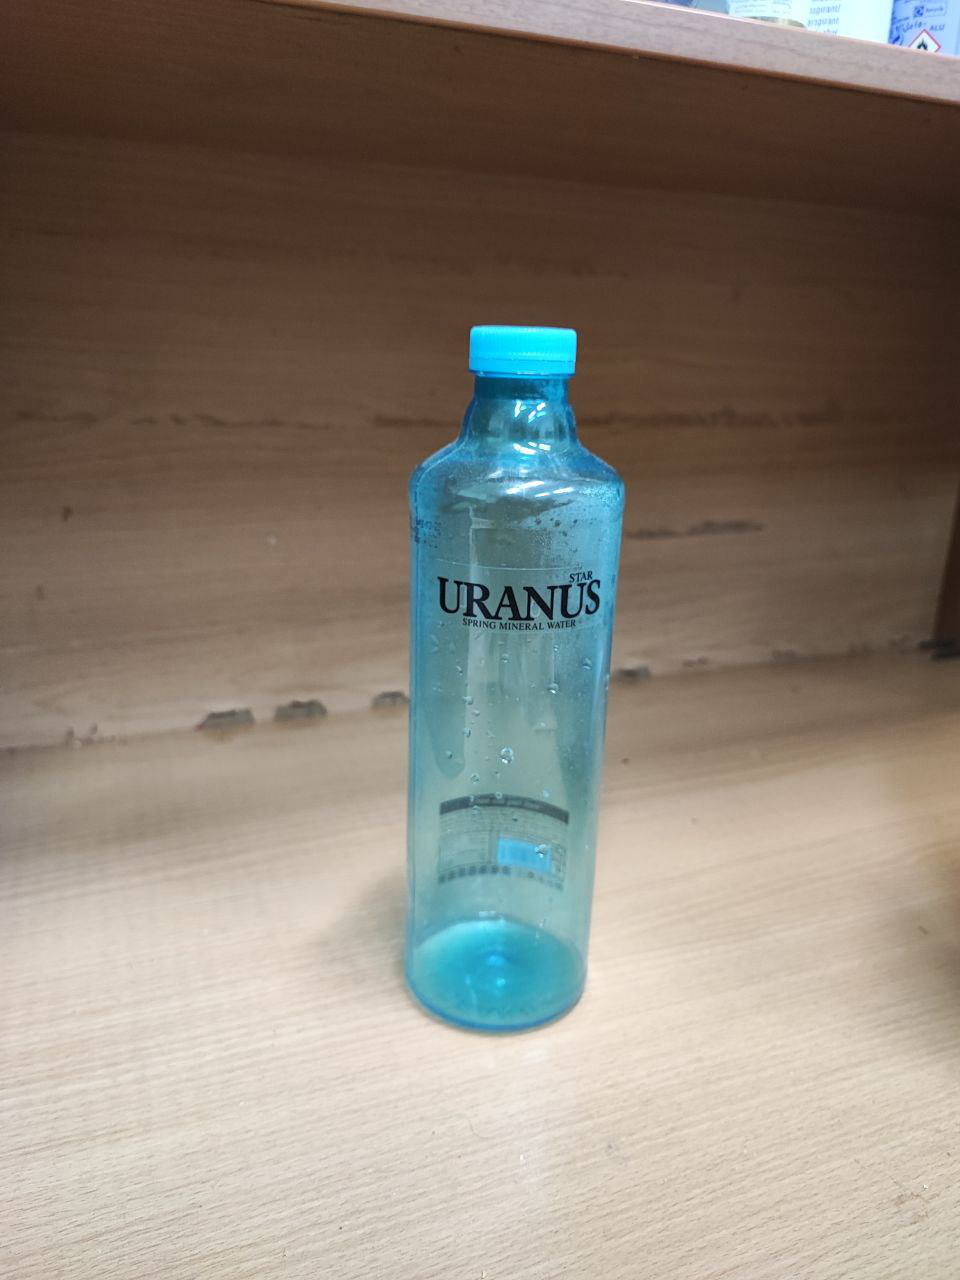

In [ ]:
import IPython.display as display
from PIL import Image
display.display(Image.open('bottle1.jpg'))

In [ ]:
img = image.load_img('bottle1.jpg', target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, 0)

In [ ]:
effnet = keras.applications.EfficientNetB0(weights='imagenet', include_top=True)
pred = effnet.predict(img)
for i in range(3):
  print('Prediction {}:'.format(i+1))
  print('Category: ', (decode_predictions(pred))[0][i][1])
  print('Probability: ', (decode_predictions(pred))[0][i][2], '\n')

1/1 [==============================] - 2s 2s/step
Prediction 1:
Category:  water_bottle
Probability:  0.6872901 

Prediction 2:
Category:  pill_bottle
Probability:  0.09597091 

Prediction 3:
Category:  nipple
Probability:  0.038375404 



## **Solving the problem**

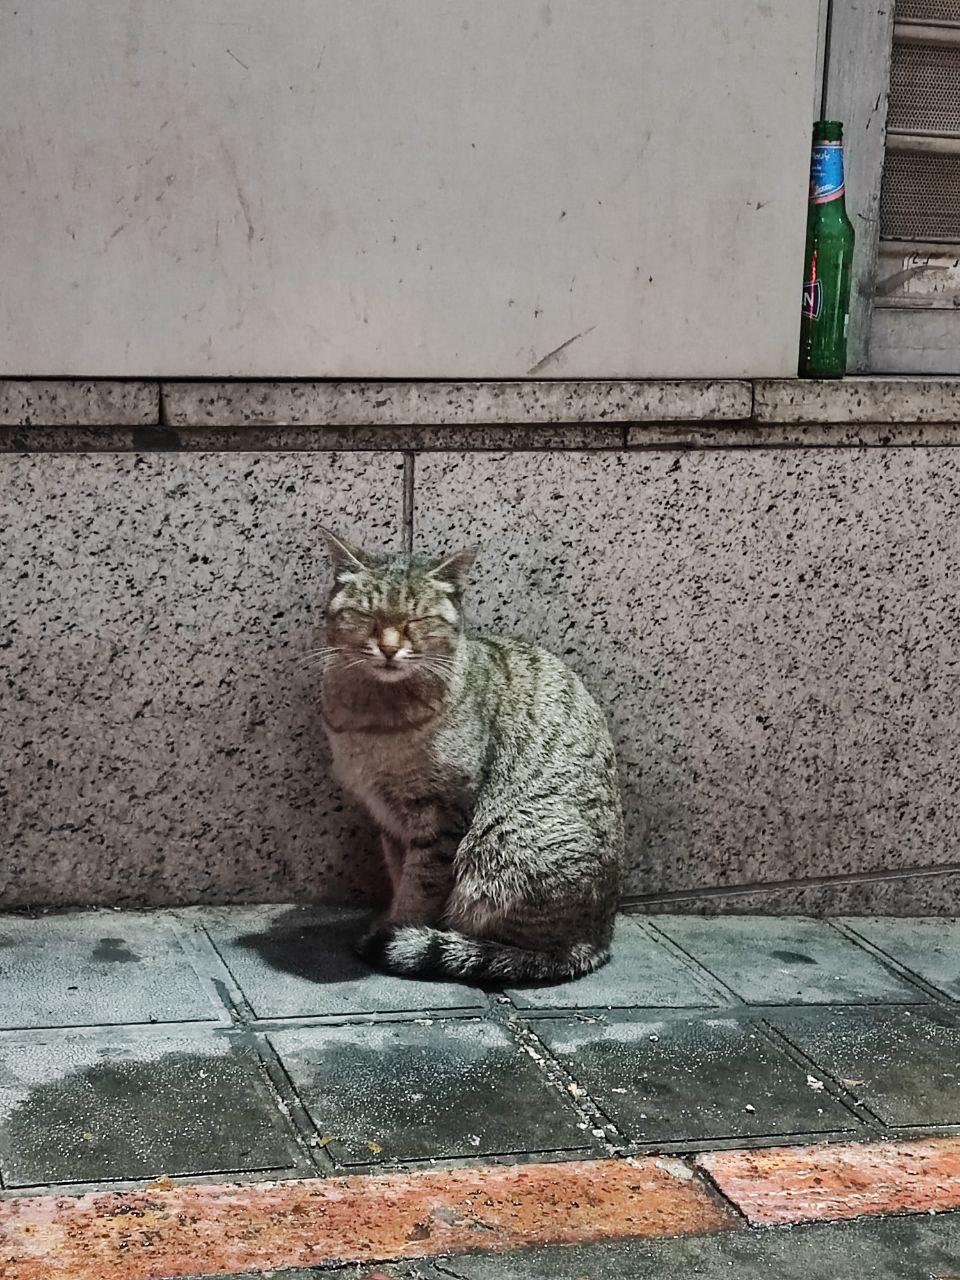

In [ ]:
import IPython.display as display
from PIL import Image
display.display(Image.open('cat2.jpg'))

In [ ]:
img = image.load_img('cat2.jpg', target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, 0)

### **Considering a threshold to solve the problem:**

In [ ]:
effnet = keras.applications.EfficientNetB0(weights='imagenet', include_top=True)
pred = effnet.predict(img)
for i in range(3):
  print('Prediction {}:'.format(i+1))
  print('Category: ', (decode_predictions(pred))[0][i][1])
  print('Probability: ', (decode_predictions(pred))[0][i][2], '\n')

threshold = 0.15
if((decode_predictions(pred))[0][0][2] < threshold):
  print('The image is not in the set of valid images that can be predicted and classified :(')

1/1 [==============================] - 1s 1s/step
Prediction 1:
Category:  fox_squirrel
Probability:  0.084247954 

Prediction 2:
Category:  Egyptian_cat
Probability:  0.07692548 

Prediction 3:
Category:  doormat
Probability:  0.075084046 

The image is not in the set of valid images that can be predicted and classified :(


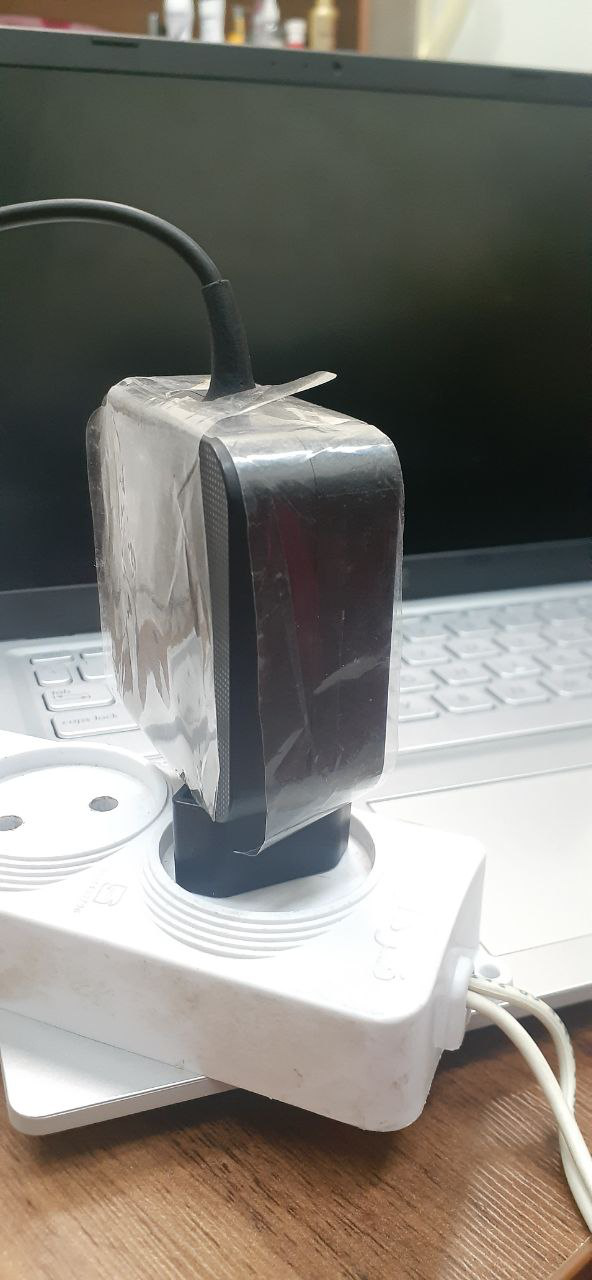

In [ ]:
import IPython.display as display
from PIL import Image
display.display(Image.open('charger.jpg'))

In [ ]:
img = image.load_img('charger.jpg', target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, 0)

In [ ]:
effnet = keras.applications.EfficientNetB0(weights='imagenet', include_top=True)
pred = effnet.predict(img)
for i in range(3):
  print('Prediction {}:'.format(i+1))
  print('Category: ', (decode_predictions(pred))[0][i][1])
  print('Probability: ', (decode_predictions(pred))[0][i][2], '\n')

threshold = 0.15
if((decode_predictions(pred))[0][0][2] < threshold):
  print('The image is not in the set of valid images that can be predicted and classified :(')

1/1 [==============================] - 1s 1s/step
Prediction 1:
Category:  mousetrap
Probability:  0.070435874 

Prediction 2:
Category:  iPod
Probability:  0.05222171 

Prediction 3:
Category:  sewing_machine
Probability:  0.046228584 

The image is not in the set of valid images that can be predicted and classified :(


## **New dataset**

In [ ]:
from keras_preprocessing.image import ImageDataGenerator, load_img
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### **Create Dataframe for Input and Output:**

In [ ]:
filenames = os.listdir("animal")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame()
df['filename'] = filenames
df['category'] = categories

df.head()

filename  category
0  dog.174.jpg         1
1  cat.117.jpg         0
2  cat.247.jpg         0
3  dog.128.jpg         1
4   cat.37.jpg         0

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.1, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [ ]:
batch_size = 64
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "animal", 
    x_col='filename',
    y_col='category',
    target_size=(224,224),
    class_mode='raw',
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "animal", 
    x_col='filename',
    y_col='category',
    target_size=(224,224),
    class_mode='raw',
    batch_size=batch_size
)

Found 540 validated image filenames.
Found 60 validated image filenames.


In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, MaxPooling2D, Dropout

### **Creating the Model:**

In [ ]:
effnet = keras.applications.EfficientNetB0(weights='imagenet', include_top=True)
EffNet = Sequential()
EffNet.add(effnet)
EffNet.add(Dense(2, activation='softmax'))

In [ ]:
lr = 1e-3
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
EffNet.compile(optimizer = keras.optimizers.Adam(learning_rate = lr), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = EffNet.fit_generator(train_generator, epochs = 5, validation_data=validation_generator, callbacks=[early_stopping])

<ipython-input-7-a6c322113b78>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = EffNet.fit_generator(train_generator, epochs = 5, validation_data=validation_generator, callbacks=[early_stopping])


Epoch 1/5
9/9 [==============================] - 91s 9s/step - loss: 0.6801 - accuracy: 0.7019 - val_loss: 0.6933 - val_accuracy: 0.4833
Epoch 2/5
9/9 [==============================] - 79s 9s/step - loss: 0.6420 - accuracy: 0.9370 - val_loss: 0.6930 - val_accuracy: 0.5167
Epoch 3/5
9/9 [==============================] - 79s 9s/step - loss: 0.6196 - accuracy: 0.9537 - val_loss: 0.6929 - val_accuracy: 0.5167
Epoch 4/5
9/9 [==============================] - 79s 9s/step - loss: 0.6160 - accuracy: 0.9185 - val_loss: 0.6929 - val_accuracy: 0.5167
Epoch 5/5
9/9 [==============================] - 78s 9s/step - loss: 0.6064 - accuracy: 0.9278 - val_loss: 0.6929 - val_accuracy: 0.5167


**PLotting accuracy and loss for train and validation data:**

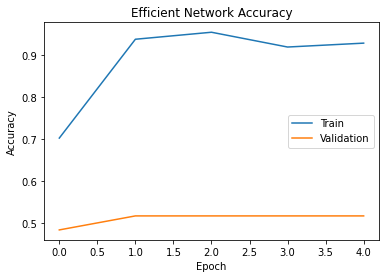

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Efficient Network Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

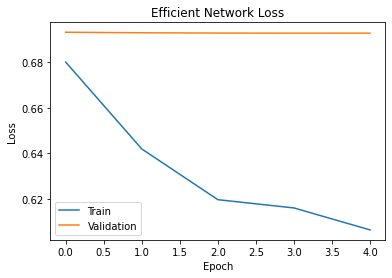

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Efficient Network Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()